In [1]:
import sys
sys.path.append("../")
from pathlib import Path

DIR = Path("/data1/xp/code/specEmbedding/score_distribution/pair/")

import numpy as np

from const import gnps
from utils import embedding

In [2]:
from utils import cosine_similarity

show_progress_bar = False

spectra, spectra_embedding = embedding(
    str(gnps.ORBITRAP_TEST_QUERY.with_suffix(".mgf")), 
    show_progress_bar
)

cosine_scores = cosine_similarity(spectra_embedding, spectra_embedding)
mask = np.diag(np.ones((cosine_scores.shape[0]))).astype(bool)
mask = ~mask
cosine_scores = cosine_scores[mask]
np.save("/data1/xp/code/specEmbedding/score_distribution/tanimoto/DreaMS.npy", cosine_scores.flatten())

In [3]:
query_spectra, query_embedding = embedding(
    str(gnps.ORBITRAP_TEST_QUERY.with_suffix(".mgf")),
    show_progress_bar
)

ref_spectra, ref_embedding = embedding(
    str(gnps.ORBITRAP_TEST_REF.with_suffix(".mgf")),
    show_progress_bar
)

cosine_scores = cosine_similarity(query_embedding, ref_embedding)

positive_indices = np.load(DIR / "positive_indices.npy", allow_pickle=True).item()
negative_indices = np.load(DIR / "negative_indices.npy", allow_pickle=True).item()

data = {
    "positive": cosine_scores[positive_indices["row"], positive_indices["col"]],
    "negative": cosine_scores[negative_indices["row"], negative_indices["col"]]
}

np.save(DIR / "DreaMS.npy", data)

In [4]:
data["positive"].shape, data["negative"].shape

((32079,), (32079,))

<Axes: ylabel='Density'>

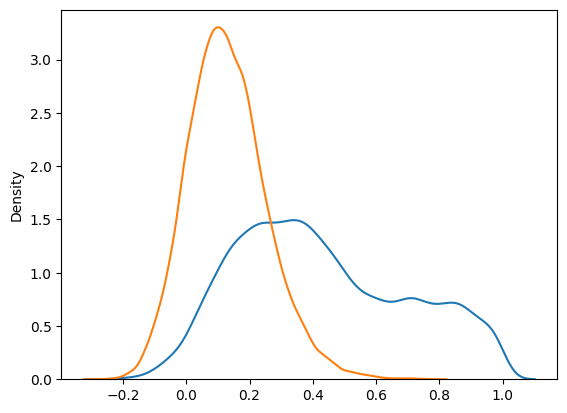

In [5]:
import seaborn as sns

sns.kdeplot(data["positive"])
sns.kdeplot(data["negative"])